  #                                    CognoRise InfoTech

## 1.Project Overview:Project Title: Tour & Travels Customer Churn Prediction

### Project Goal: To develop predictive models that can accurately identify customers who are likely to stop using the travel company's services (churn), thereby enabling the company to implement targeted retention strategies and save resources.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, f1_score
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv(r'Customertravel.csv')
df

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


## 2.Dataset Description

## Features (Independent Variables):
### Age: The age of the customer.
### FrequentFlyer: Likely indicates the customer's frequent flyer status with the airline.
### AnnualIncomeClass: Categorizes the customer's annual income level.
### ServicesOpted: Possibly represents the frequency or types of services the customer has opted for (e.g., flight bookings, hotel reservations, travel packages).
### AccountSyncedToSocialMedia: Indicates whether the customer has linked their social media accounts to the travel company's platform.
### BookedHotelOrNot: A binary variable indicating whether the customer has booked a hotel through the company.

In [3]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [4]:
df.tail()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0
953,31,Yes,High Income,1,No,No,0


In [5]:
df.sample(5)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
455,38,No,Middle Income,2,No,Yes,0
62,30,No,Middle Income,4,Yes,No,0
292,29,No,Low Income,1,Yes,No,0
134,30,No,Low Income,3,No,No,0
200,29,No,Middle Income,3,No,Yes,0


# Summary Statistics
We use summary  statistics to get sn overview of the numerical features.

# Numerical Summary Statistics:
Count: The Number Of Non-missing Values.

Mean: The Average value.

Std: The Standard Deviation, indicating the spread of the values.

min: The Minimum Value.

25%: The 25th precentike value (first quartile).

50%: The median value(second quartile).

75%: The 75th percentile value (third quartile).

max: The maximum value.

median: The median value, explicitly added for clarity.

mode: The most frequently occurring value.

missing_values: The count of missing values in each column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [7]:
df.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


In [8]:
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [9]:
df.drop_duplicates(inplace = True)
df

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
932,29,No,Low Income,3,Yes,No,0
936,36,No Record,Middle Income,1,Yes,Yes,0
940,27,No,Low Income,1,No,Yes,0
947,38,No Record,Middle Income,2,Yes,No,0


# Mapping the values 

In [10]:
df['AccountSyncedToSocialMedia'].value_counts()

No     261
Yes    186
Name: AccountSyncedToSocialMedia, dtype: int64

In [11]:
df['AnnualIncomeClass'].value_counts()

Low Income       205
Middle Income    173
High Income       69
Name: AnnualIncomeClass, dtype: int64

In [12]:
df['FrequentFlyer'].value_counts()

No           250
Yes          144
No Record     53
Name: FrequentFlyer, dtype: int64

In [13]:
df['BookedHotelOrNot'].value_counts()

No     258
Yes    189
Name: BookedHotelOrNot, dtype: int64

In [14]:
df['AccountSyncedToSocialMedia'] = df['AccountSyncedToSocialMedia'].map({"Yes" :1, "No" : 2})

In [15]:
df['BookedHotelOrNot'] = df['BookedHotelOrNot'].map({"Yes" :1, "No" : 2})

In [16]:
df['FrequentFlyer'] = df['FrequentFlyer'].map({"Yes" :1, "No" : 2,"No Record" : 3})

In [17]:
df['AnnualIncomeClass'] = df['AnnualIncomeClass'].map({"Low Income" :1, "Middle Income" : 2,"High Income" : 3})

# . Exploratory Data Analysis (EDA)

In [18]:

# Set up the plot style
plt.style.use('seaborn-darkgrid')

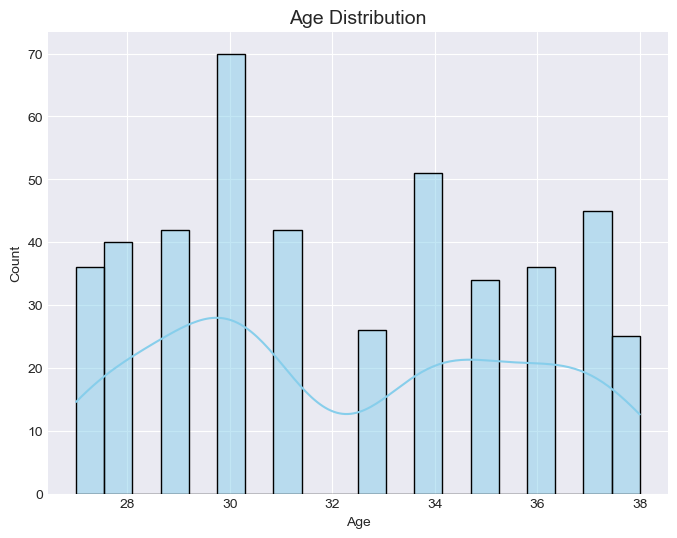

In [19]:
# 1. Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

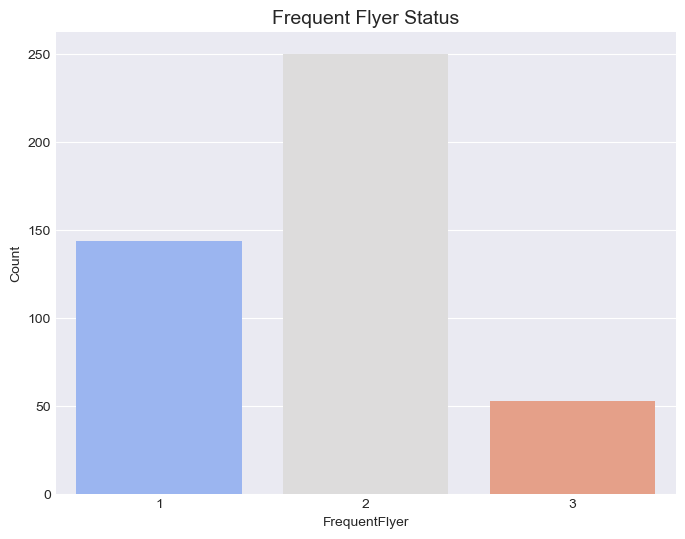

In [20]:
# 2. Bar plot for Frequent Flyer status
plt.figure(figsize=(8, 6))
sns.countplot(x='FrequentFlyer', data=df, palette='coolwarm')
plt.title('Frequent Flyer Status', fontsize=14)
plt.xlabel('FrequentFlyer')
plt.ylabel('Count')
plt.show()

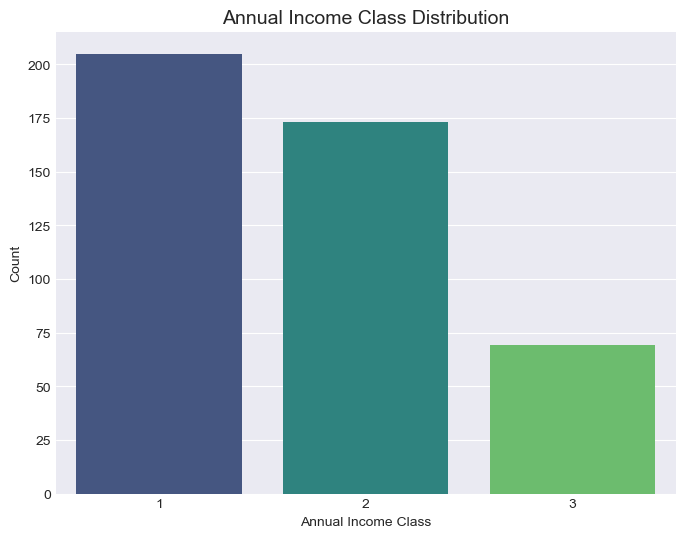

In [21]:
# 3. Bar plot for Annual Income Class
plt.figure(figsize=(8, 6))
sns.countplot(x='AnnualIncomeClass', data=df, palette='viridis')
plt.title('Annual Income Class Distribution', fontsize=14)
plt.xlabel('Annual Income Class')
plt.ylabel('Count')
plt.show()

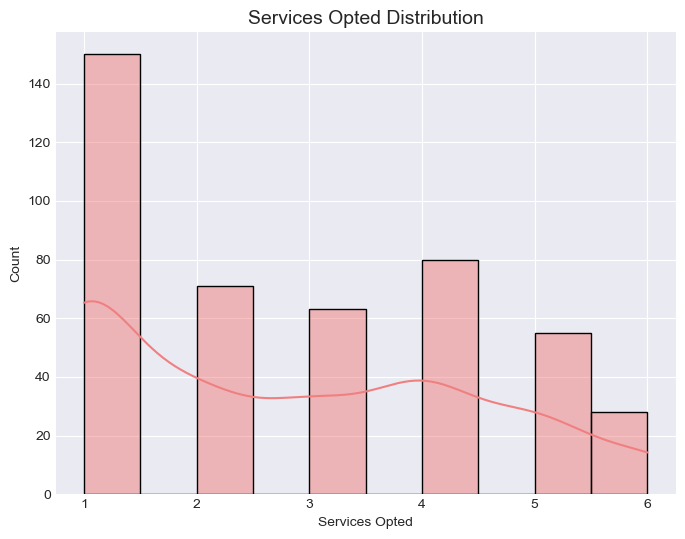

In [22]:
# 4. Distribution of Services Opted
plt.figure(figsize=(8, 6))
sns.histplot(df['ServicesOpted'], bins=10, kde=True, color='lightcoral')
plt.title('Services Opted Distribution', fontsize=14)
plt.xlabel('Services Opted')
plt.ylabel('Count')
plt.show()

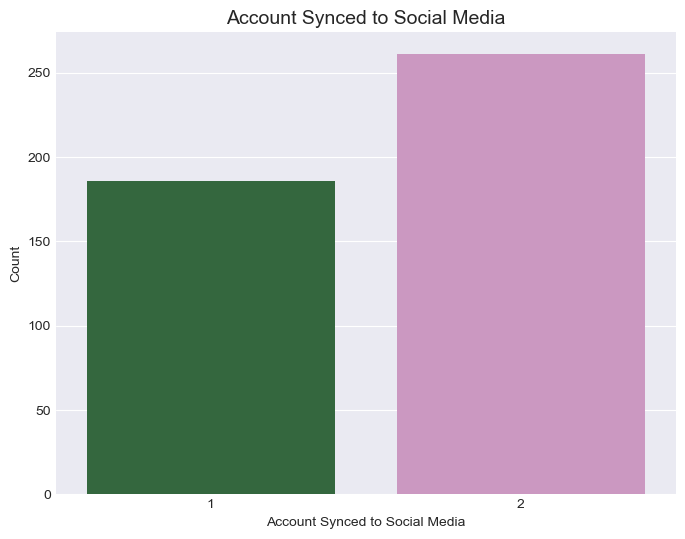

In [23]:
# 5. Bar plot for Social Media Sync
plt.figure(figsize=(8, 6))
sns.countplot(x='AccountSyncedToSocialMedia', data=df, palette='cubehelix')
plt.title('Account Synced to Social Media', fontsize=14)
plt.xlabel('Account Synced to Social Media')
plt.ylabel('Count')
plt.show()

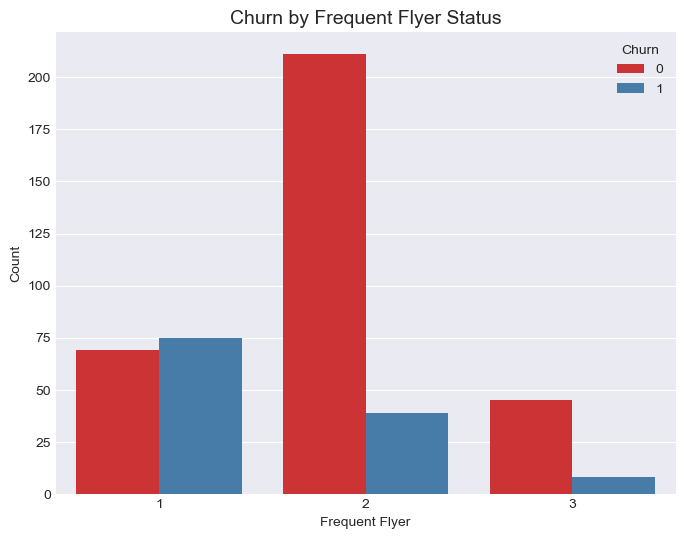

In [24]:
# 6. Churn Rate by Frequent Flyer Status
plt.figure(figsize=(8, 6))
sns.countplot(x='FrequentFlyer', hue='Target', data=df, palette='Set1')
plt.title('Churn by Frequent Flyer Status', fontsize=14)
plt.xlabel('Frequent Flyer')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

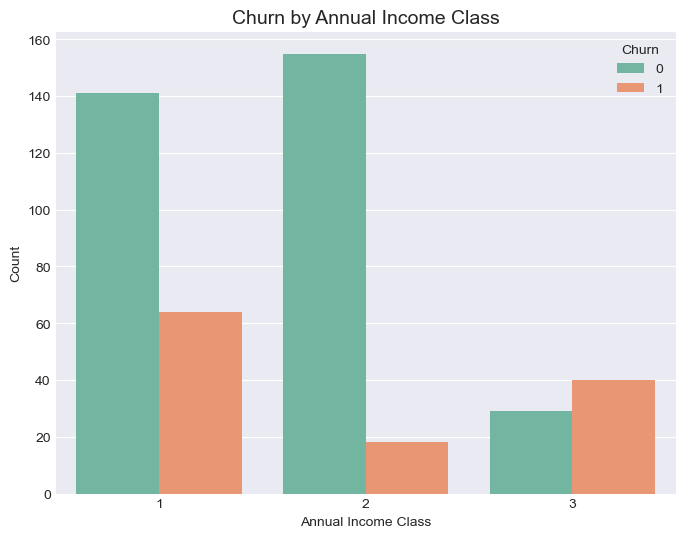

In [25]:
# 7. Churn Rate by Annual Income Class
plt.figure(figsize=(8, 6))
sns.countplot(x='AnnualIncomeClass', hue='Target', data=df, palette='Set2')
plt.title('Churn by Annual Income Class', fontsize=14)
plt.xlabel('Annual Income Class')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

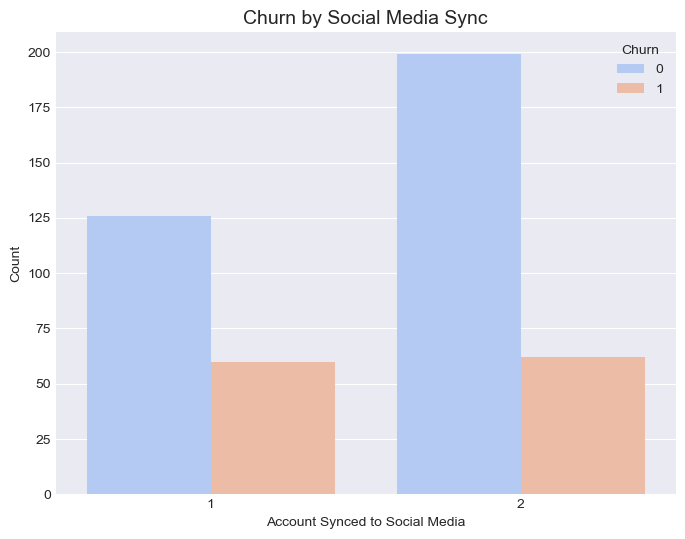

In [26]:
# 8. Churn Rate by Social Media Sync
plt.figure(figsize=(8, 6))
sns.countplot(x='AccountSyncedToSocialMedia', hue='Target', data=df, palette='coolwarm')
plt.title('Churn by Social Media Sync', fontsize=14)
plt.xlabel('Account Synced to Social Media')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

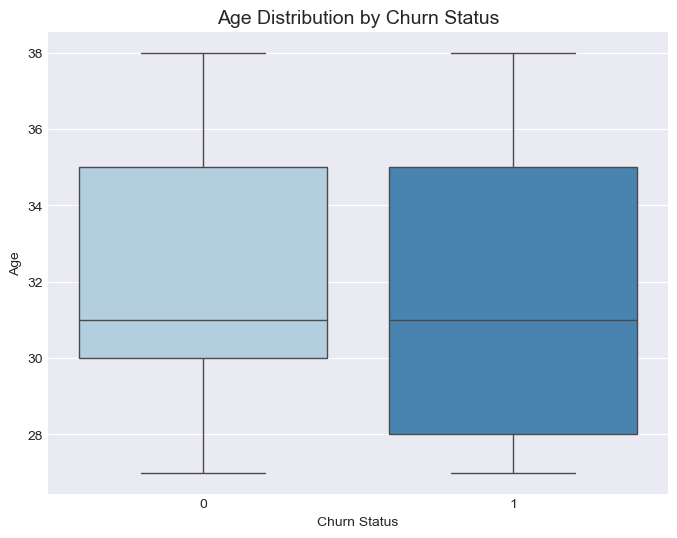

In [27]:
# 9. Box plot for Age distribution by Churn status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Target', y='Age', data=df, palette='Blues')
plt.title('Age Distribution by Churn Status', fontsize=14)
plt.xlabel('Churn Status')
plt.ylabel('Age')
plt.show()

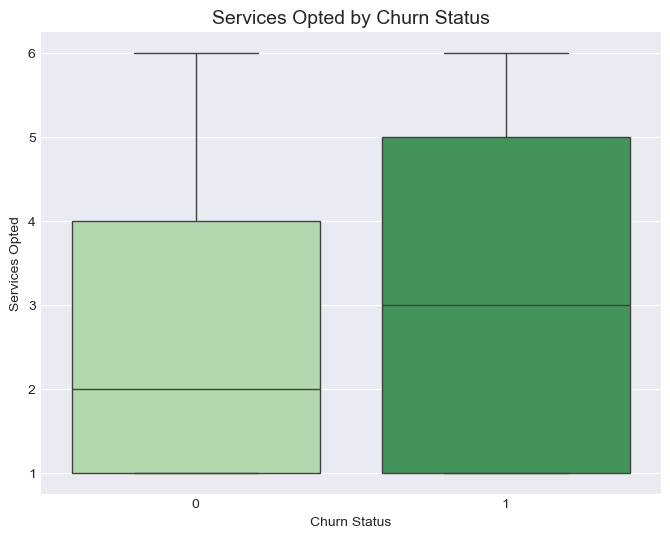

In [28]:
# 10. Box plot for Services Opted by Churn Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Target', y='ServicesOpted', data=df, palette='Greens')
plt.title('Services Opted by Churn Status', fontsize=14)
plt.xlabel('Churn Status')
plt.ylabel('Services Opted')
plt.show()

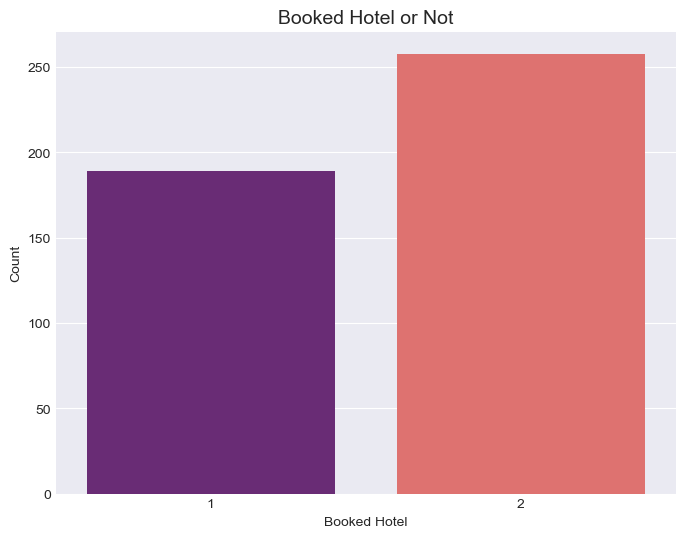

In [29]:
# 11. Count of Booked Hotel or Not
plt.figure(figsize=(8, 6))
sns.countplot(x='BookedHotelOrNot', data=df, palette='magma')
plt.title('Booked Hotel or Not', fontsize=14)
plt.xlabel('Booked Hotel')
plt.ylabel('Count')
plt.show()

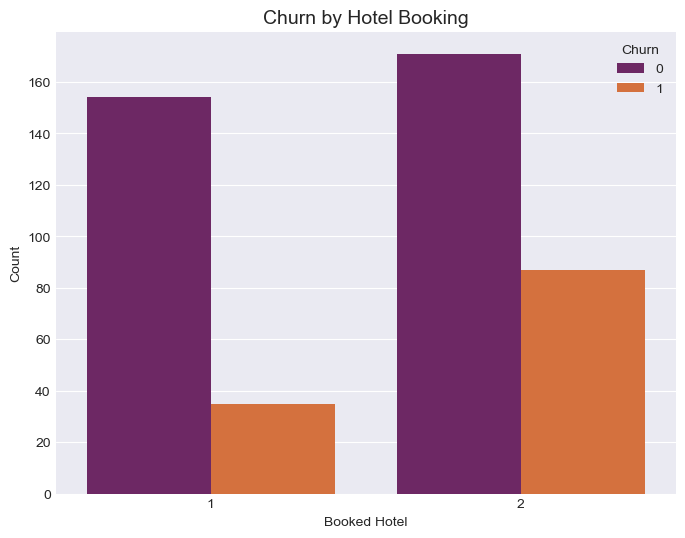

In [30]:
# 12. Churn Rate by Booking Hotel or Not
plt.figure(figsize=(8, 6))
sns.countplot(x='BookedHotelOrNot', hue='Target', data=df, palette='inferno')
plt.title('Churn by Hotel Booking', fontsize=14)
plt.xlabel('Booked Hotel')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

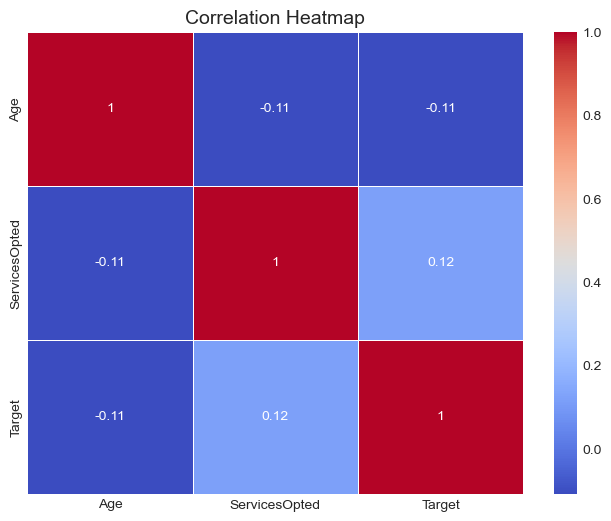

In [31]:
# 13. Heatmap of correlations between numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'ServicesOpted', 'Target']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

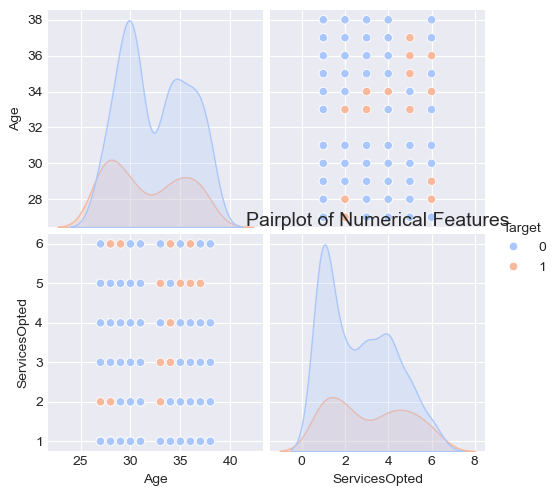

In [32]:
# 14. Pairplot of numerical features with churn
sns.pairplot(df[['Age', 'ServicesOpted', 'Target']], hue='Target', palette='coolwarm')
plt.title('Pairplot of Numerical Features', fontsize=14)
plt.show()

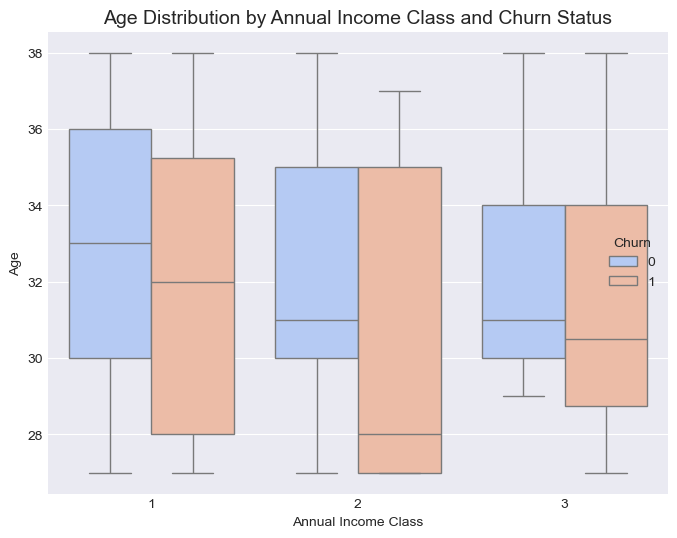

In [33]:
# 15. Churn Rate by Age and Annual Income Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='AnnualIncomeClass', y='Age', hue='Target', data=df, palette='coolwarm')
plt.title('Age Distribution by Annual Income Class and Churn Status', fontsize=14)
plt.xlabel('Annual Income Class')
plt.ylabel('Age')
plt.legend(title='Churn')
plt.show()

#  Model Training: Train A Variety of Machine Learning Models(e.g, Logistic Regression, Random Forest, Gradient Boosting).


#  Model Evaluation: Evalute model Performance  using metrics  such as precision, recall, F1 score, and Accuray. Additionally, handle class imbalance using techniques such as SMOTE(Synthenic Minority Over-smapling Technique)if necessary 

In [34]:
x=df.drop(columns=['Target'])
y=df['Target']

##Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)
x_train, x_test, y_train, y_test

(     Age  FrequentFlyer  AnnualIncomeClass  ServicesOpted  \
 17    30              1                  3              1   
 72    30              2                  2              1   
 220   38              2                  1              1   
 349   30              1                  1              4   
 32    27              2                  2              3   
 ..   ...            ...                ...            ...   
 118   34              2                  1              5   
 408   34              3                  2              1   
 622   35              2                  1              4   
 909   28              1                  3              4   
 113   31              1                  3              1   
 
      AccountSyncedToSocialMedia  BookedHotelOrNot  
 17                            1                 2  
 72                            1                 1  
 220                           2                 1  
 349                           2          

# Logistic Regression Model

In [35]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [37]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Logistic Regression Model Results:")
print("Accuracy:", accuracy)
print("confusion Matrix :", conf_matrix)
print("Precision:", precision)
print("recall:", recall)
print("F1 Score", f1)

Logistic Regression Model Results:
Accuracy: 0.8111111111111111
confusion Matrix : [[67  6]
 [11  6]]
Precision: 0.5
recall: 0.35294117647058826
F1 Score 0.41379310344827586


# Decision tree classification

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
y_pred1 = model1.predict(x_test)
y_pred1

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [41]:
accuracy1 = accuracy_score(y_test,y_pred1)
conf_matrix1 = confusion_matrix(y_test,y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test,y_pred1)
f11 = f1_score(y_test,y_pred1)

print("Decision Tree Classification Model Results:")
print("Accuracy:", accuracy1)
print("confusion Matrix :", conf_matrix1)
print("Precision:", precision1)
print("recall:", recall1)
print("F1 Score", f11)

Decision Tree Classification Model Results:
Accuracy: 0.7777777777777778
confusion Matrix : [[59 14]
 [ 6 11]]
Precision: 0.44
recall: 0.6470588235294118
F1 Score 0.5238095238095238


In [42]:
model.score(x_train, y_train)

0.7675070028011205

In [43]:
model.score(x_test,y_test)

0.8111111111111111

# Random Forest

In [44]:
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
y_pred2 = model2.predict(x_test)
y_pred2

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [46]:
accuracy2 = accuracy_score(y_test,y_pred2)
conf_matrix2 = confusion_matrix(y_test,y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test,y_pred2)
f12 = f1_score(y_test,y_pred2)

print("Random Forest Classification Model Results:")
print("Accuracy:", accuracy2)
print("confusion Matrix :", conf_matrix2)
print("Precision:", precision2)
print("recall:", recall2)
print("F1 Score", f12)

Random Forest Classification Model Results:
Accuracy: 0.7888888888888889
confusion Matrix : [[59 14]
 [ 5 12]]
Precision: 0.46153846153846156
recall: 0.7058823529411765
F1 Score 0.5581395348837209


#  Support Vector Machine 

In [47]:
from sklearn.svm import SVC

In [48]:
model3 = SVC()
model3.fit(x_train, y_train)

SVC()

In [49]:
y_pred3 = model3.predict(x_test)
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [50]:
accuracy3 = accuracy_score(y_test,y_pred3)
conf_matrix3 = confusion_matrix(y_test,y_pred3)
precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test,y_pred3)
f13 = f1_score(y_test,y_pred3)

print("SVM Model Results:")
print("Accuracy:", accuracy3)
print("confusion Matrix :", conf_matrix3)
print("Precision:", precision3)
print("recall:", recall3)
print("F1 Score", f13)

SVM Model Results:
Accuracy: 0.8111111111111111
confusion Matrix : [[73  0]
 [17  0]]
Precision: 0.0
recall: 0.0
F1 Score 0.0


# Navie bayes Calassifier

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
model4 = GaussianNB()
model4.fit(x_train, y_train)

GaussianNB()

In [53]:
y_pred4 = model4.predict(x_test)
y_pred4

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [54]:
accuracy4 = accuracy_score(y_test,y_pred4)
conf_matrix4 = confusion_matrix(y_test,y_pred4)
precision4 = precision_score(y_test, y_pred4)
recall4 = recall_score(y_test,y_pred4)
f14 = f1_score(y_test,y_pred4)

print("Navie Bayes Model Results:")
print("Accuracy:", accuracy4)
print("confusion Matrix :", conf_matrix4)
print("Precision:", precision4)
print("recall:", recall4)
print("F1 Score", f14)

Navie Bayes Model Results:
Accuracy: 0.8111111111111111
confusion Matrix : [[65  8]
 [ 9  8]]
Precision: 0.5
recall: 0.47058823529411764
F1 Score 0.48484848484848486


# K neighborsClassifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
model5 = KNeighborsClassifier(n_neighbors=3)
model5.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [57]:
 y_pred5 = model5.predict(x_test)
y_pred5

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [58]:
accuracy5 = accuracy_score(y_test, y_pred5)
conf_matrix5 = confusion_matrix(y_test, y_pred5)
precision5 = precision_score(y_test, y_pred5)
recall5 = recall_score(y_test, y_pred5)
f15 = f1_score(y_test, y_pred5)
print("KNN Model Results:")
print("Accuracy:", accuracy5)
print("Confusion Matrix:", conf_matrix5)
print("Precision:", precision5)
print("Recall:", recall5)
print("F1 Score:", f15)

KNN Model Results:
Accuracy: 0.7666666666666667
Confusion Matrix: [[59 14]
 [ 7 10]]
Precision: 0.4166666666666667
Recall: 0.5882352941176471
F1 Score: 0.4878048780487805


# Gradient boosting classification

In [59]:
model6 = GradientBoostingClassifier()
model6.fit(x_train, y_train)

GradientBoostingClassifier()

In [60]:
y_pred6 = model6.predict(x_test)
y_pred6


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [61]:
accuracy6 = accuracy_score(y_test, y_pred6)
conf_matrix6 = confusion_matrix(y_test, y_pred6)
precision6 = precision_score(y_test, y_pred6)
recall6 = recall_score(y_test, y_pred6)
f16 = f1_score(y_test, y_pred6)
print("Gradient Boosting Model Results:")
print("Accuracy:", accuracy6)
print("Confusion Matrix:", conf_matrix6)
print("Precision:", precision6)
print("Recall:", recall6)
print("F1 Score:", f16)

Gradient Boosting Model Results:
Accuracy: 0.8555555555555555
Confusion Matrix: [[66  7]
 [ 6 11]]
Precision: 0.6111111111111112
Recall: 0.6470588235294118
F1 Score: 0.6285714285714286


# Here are the accuracy scores for different machine learning models
Logistic Regression: 81.0%

Decision Tree: 78.0%

Random Forest: 76.0% 

SVM (Support Vector Machine): 81.0%

Naive Bayes: 81.0%

KNN (K-Nearest Neighbors): 76.0%

Gradient Boosting: 85.0%

NameError: name 'bars' is not defined

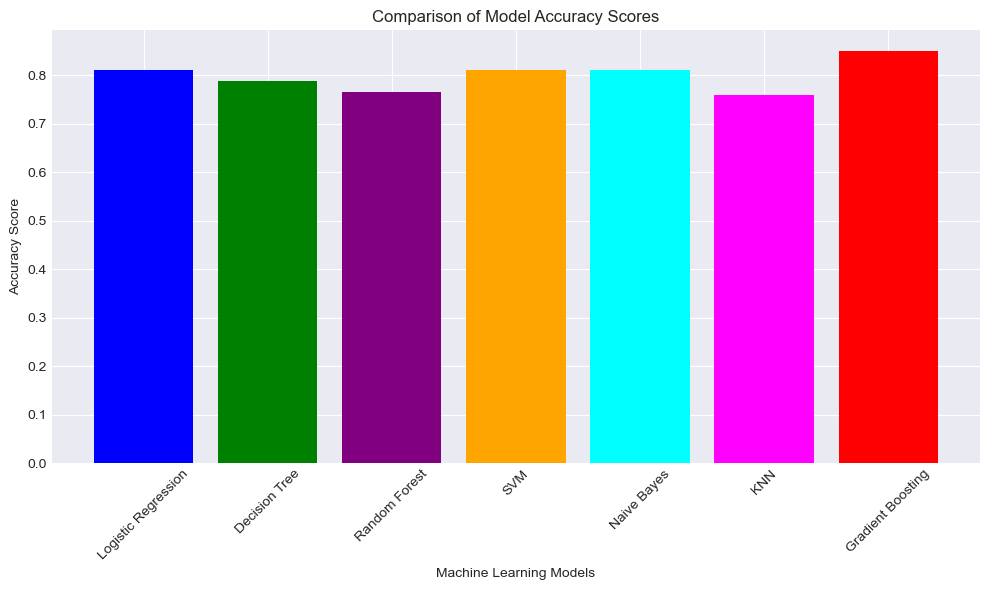

In [62]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM','Naive Bayes', 'KNN', 'Gradient Boosting']
accuracy_scores = [0.811, 0.788, 0.766, 0.811, 0.811, 0.760, 0.85]
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'red']
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=colors)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability if needed
plt.tight_layout() # Ensures labels are not cut off
for bar, score in zip(bars, accuracy_scores):
 yval = bar.get_height()
plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(score, 3),ha='center', va='bottom', fontsize=8)

# These precision scores measure the proportion of true positive predictions among all positive predictions made by each model. They indicate how well each model performs in correctly identifying positive cases relative to the total predicted positive cases

Based on the precision scores for the machine learning models:

Logistic Regression: 0.5

Decision Tree: 45.8%

Random Forest: 41.6%

SVM (Support Vector Machine): 0.0%

Naive Bayes: 0.5%

KNN (K-Nearest Neighbors): 41.6%

Gradient Boosting: 61.1%

In [ ]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM','Naive Bayes', 'KNN', 'Gradient Boosting']
precision_scores = [0.5,0.458,0.416,0.0,0.05,0.416,0.611]
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'red']
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, precision_scores, color=colors) # Assign the result␣of plt.bar to the variable 'bars'
plt.xlabel('Machine Learning Models')
plt.ylabel('precision scores')
plt.title('Comparison of Precision Scores')
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.tight_layout()
for bar, score in zip(bars, precision_scores):
 yval = bar.get_height()
plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(score, 3),ha='center', va='bottom', fontsize=8)
plt.show()


# Recall score measures the proportion of true positive instances that were correctly identified by the model out of all actual positive instances. A score of 1.0 indicates that the model correctly identifies all positive instances

Based on the Recall scores for the machine learning models:

Logistic Regression: 35.2%

Decision Tree: 64.7%

Random Forest: 58.8%

SVM (Support Vector Machine): 0.0

Naive Bayes: 47.0%

KNN (K-Nearest Neighbors): 58.8%

Gradient Boosting: 64.7%

In [ ]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM','Naive Bayes', 'KNN', 'Gradient Boosting']
Recall_scores = [0.352,0.647,0.588,0,0.477,0.588,0.647]
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'red']
plt.figure(figsize=(10, 6))
# Assign the result of plt.bar to the variable 'bars' so it is available for use later
bars = plt.bar(model_names, Recall_scores, color=colors)
plt.xlabel('Machine Learning Models')
plt.ylabel('Recall Score')
plt.title('Comparison of Recall Scores')
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.tight_layout()
# Iterate over the bars and scores using zip
for bar, score in zip(bars, Recall_scores):
 yval = bar.get_height()
plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(score, 3),ha='center', va='bottom', fontsize=8)
plt.show()


# The F1 score combines precision and recall into a single metric and ranges from 0 to 1, where a higher score indicates better performance.

In [ ]:
Based on the F1 scores provided for the machine learning models:

Logistic Regression: 0.413

Decision Tree: 0.536

Random Forest: 0.487

SVM (Support Vector Machine): 0.0

Naive Bayes: 0.484

KNN (K-Nearest Neighbors): 0.487

Gradient Boosting: 0.628


In [ ]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM','Naive Bayes', 'KNN', 'Gradient Boosting']
F1_scores = [0.413,0.536,0.487,0.0,0.484,0.487,0.628]
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'red']
plt.figure(figsize=(10, 6))
# Assign the result of plt.bar to the variable bars
bars = plt.bar(model_names, F1_scores, color=colors) # Changed to plot␣F1_scores instead of precision_scores
plt.xlabel('Machine Learning Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores')
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
plt.tight_layout()
for bar, score in zip(bars, F1_scores):
 yval = bar.get_height()
plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(score, 3),ha='center', va='bottom', fontsize=8)
plt.show()

# BUILDING A PREDETICVIE SYSTEM 

In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

# Assuming you have a trained GradientBoostingClassifier object called 'model'
model6 = GradientBoostingClassifier()

# Sample input data
Testing_data_value = np.array([ 30, 0, 3, 6, 1, 0])
# Age=30, FrequentFlyer=0, AnnualIncomeClass=3, ServicesOpted=6, AccountSyncedToSocialMedia=1, BookedHotelOrNot=0

# Reshape the input data to a 2D array
Testing_data_value_reshape = Testing_data_value.reshape(1, -1)

# Predict the class using the reshaped input data
prediction = model.predict(Testing_data_value_reshape)

if prediction[0] == 1:
    print("Customer is predicted to churn.")
else:
    print("Customer is predicted to stay.")